In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [39]:
df=pd.read_excel(r"C:\Users\Hp\imarticus_aarya/Superstore.xls")

In [40]:
import os
print(os.getcwd())

C:\Users\Hp\imarticus_aarya


In [41]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [42]:
df=df[['Customer ID','Order Date','Sales']]

In [45]:
df

,Customer ID,Order Date,Sales
0,CG-12520,2016-11-08,261.9600
1,CG-12520,2016-11-08,731.9400
2,DV-13045,2016-06-12,14.6200
3,SO-20335,2015-10-11,957.5775
4,SO-20335,2015-10-11,22.3680
...,...,...,...
9989,TB-21400,2014-01-21,25.2480
9990,DB-13060,2017-02-26,91.9600
9991,DB-13060,2017-02-26,258.5760
9992,DB-13060,2017-02-26,29.6000


In [49]:
df.dtypes

Customer ID            object
Order Date     datetime64[ns]
Sales                 float64
dtype: object

In [51]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [53]:
df.dropna(subset=['Customer ID','Order Date','Sales'],inplace=True)

In [55]:
df

,Customer ID,Order Date,Sales
0,CG-12520,2016-11-08,261.9600
1,CG-12520,2016-11-08,731.9400
2,DV-13045,2016-06-12,14.6200
3,SO-20335,2015-10-11,957.5775
4,SO-20335,2015-10-11,22.3680
...,...,...,...
9989,TB-21400,2014-01-21,25.2480
9990,DB-13060,2017-02-26,91.9600
9991,DB-13060,2017-02-26,258.5760
9992,DB-13060,2017-02-26,29.6000


In [57]:
ref_date=df['Order Date'].max()+pd.Timedelta(days=1)
ref_date

Timestamp('2017-12-31 00:00:00')

In [59]:
rfm=df.groupby('Customer ID').agg({
    'Order Date':lambda x:(ref_date-x.max()).days,
    'Customer ID':'count',
    'Sales':'sum',
})

rfm.columns=['Recency','Frequency','Monetary']

rfm=rfm.reset_index()
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,11,5563.560
1,AA-10375,20,15,1056.390
2,AA-10480,260,12,1790.512
3,AA-10645,56,18,5086.935
4,AB-10015,416,6,886.156


In [61]:
rfm['R_Score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1]).astype(int)
rfm['F_Score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)
rfm['M_Score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5]).astype(int)

In [63]:
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 3 and row['F_Score'] <= 2:
        return 'Recent Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'At Risk'
    elif row['M_Score'] >= 4:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


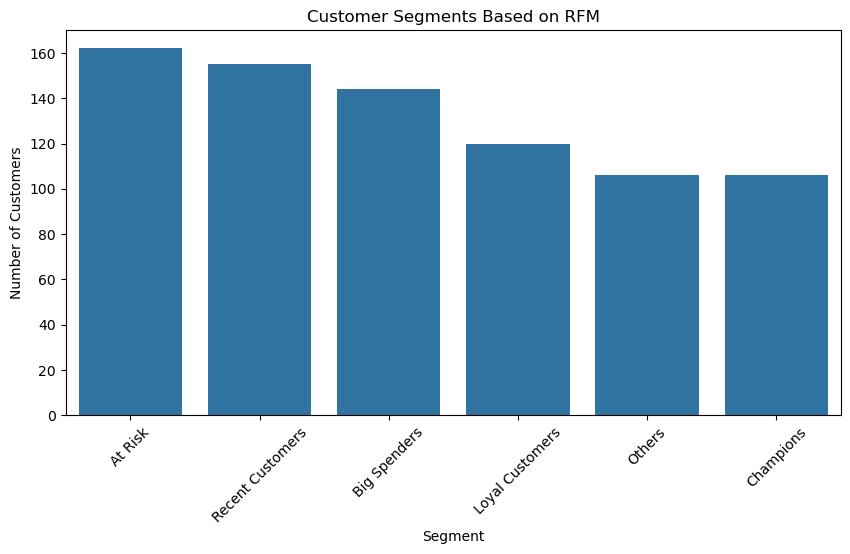

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments Based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [67]:
x=rfm[['Recency','Frequency','Monetary']]
y=rfm['Segment']

In [69]:
#Splitting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [71]:
#Decison Tree Model
model=DecisionTreeClassifier()

In [73]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
pred=model.predict(x_test)

In [77]:
print(classification_report(y_test, pred))

                  precision    recall  f1-score   support

         At Risk       0.88      0.95      0.91        22
    Big Spenders       0.96      0.92      0.94        25
       Champions       1.00      1.00      1.00        29
 Loyal Customers       0.96      0.96      0.96        23
          Others       0.95      0.86      0.90        22
Recent Customers       0.95      0.97      0.96        38

        accuracy                           0.95       159
       macro avg       0.95      0.94      0.95       159
    weighted avg       0.95      0.95      0.95       159



In [79]:
#Random Forest Model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [81]:
pred=model.predict(x_test)

In [83]:
print(classification_report(y_test, pred))

                  precision    recall  f1-score   support

         At Risk       0.88      1.00      0.94        22
    Big Spenders       1.00      0.92      0.96        25
       Champions       1.00      1.00      1.00        29
 Loyal Customers       1.00      0.96      0.98        23
          Others       1.00      0.82      0.90        22
Recent Customers       0.90      1.00      0.95        38

        accuracy                           0.96       159
       macro avg       0.96      0.95      0.95       159
    weighted avg       0.96      0.96      0.96       159



In [85]:
# THEN add predicted and actual to a new DataFrame (or copy of x_test)
x_test_result = x_test.copy()
x_test_result['Actual'] = y_test
x_test_result['Predicted'] = pred

# Display results
print(x_test_result.head())
print(x_test_result.tail())

     Recency  Frequency  Monetary            Actual         Predicted
137      800         12  2854.115      Big Spenders      Big Spenders
198       13         10  1155.202  Recent Customers  Recent Customers
739      286          7  1387.559           At Risk           At Risk
583       58          5   688.324  Recent Customers  Recent Customers
655       20          4   615.932  Recent Customers  Recent Customers
     Recency  Frequency   Monetary           Actual        Predicted
737      203         17   9133.990     Big Spenders     Big Spenders
760      358          2      4.833          At Risk          At Risk
541       27         11    855.116  Loyal Customers  Loyal Customers
375       62         13   4427.142     Big Spenders     Big Spenders
434       48         29  14175.229        Champions        Champions


In [87]:
#XGB Model
# Encode the target labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y is your original target with string labels

# Now split the encoded labels
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Convert predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred_labels))


                  precision    recall  f1-score   support

         At Risk       0.88      1.00      0.94        22
    Big Spenders       1.00      0.92      0.96        25
       Champions       1.00      1.00      1.00        29
 Loyal Customers       0.96      0.96      0.96        23
          Others       1.00      0.82      0.90        22
Recent Customers       0.90      0.97      0.94        38

        accuracy                           0.95       159
       macro avg       0.96      0.94      0.95       159
    weighted avg       0.95      0.95      0.95       159



# All models perform good but as random forest slightly better with accuracy with go with random forest